In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

df = pd.read_excel('/content/Housing Data.xlsx')

df.head()

,Name,Price,Acres,Bedrooms,Bathrooms,Age
0,House 1,549000,0.36,4,3,51
1,House 2,819000,0.49,5,2,79
2,House 3,1795000,3.10,4,4,47
3,House 4,499000,0.40,3,2,70
4,House 5,990000,1.52,5,4,84


In [3]:
df =  df.drop(columns=['Name'], axis=1)

df.head()

,Price,Acres,Bedrooms,Bathrooms,Age
0,549000,0.36,4,3,51
1,819000,0.49,5,2,79
2,1795000,3.10,4,4,47
3,499000,0.40,3,2,70
4,990000,1.52,5,4,84


In [4]:
df.corr()

,Price,Acres,Bedrooms,Bathrooms,Age
Price,1.000000,0.531217,0.547727,0.785182,-0.601551
Acres,0.531217,1.000000,0.257161,0.354737,-0.112410
Bedrooms,0.547727,0.257161,1.000000,0.739679,-0.290759
Bathrooms,0.785182,0.354737,0.739679,1.000000,-0.583771
Age,-0.601551,-0.112410,-0.290759,-0.583771,1.000000


In [5]:
# normalization
df = (df - df.mean())/df.std()

df.head()

,Price,Acres,Bedrooms,Bathrooms,Age
0,-0.952954,-0.722048,-0.263442,-0.535758,-0.077156
1,-0.642137,-0.661293,0.385031,-1.071517,0.658292
2,0.481405,0.558477,-0.263442,0.000000,-0.182220
3,-1.010512,-0.703354,-0.911915,-1.071517,0.421898
4,-0.445287,-0.179928,0.385031,0.000000,0.789622


In [6]:
# creating training variables
X = df[['Acres', 'Bedrooms', 'Bathrooms', 'Age']]
y = df['Price']

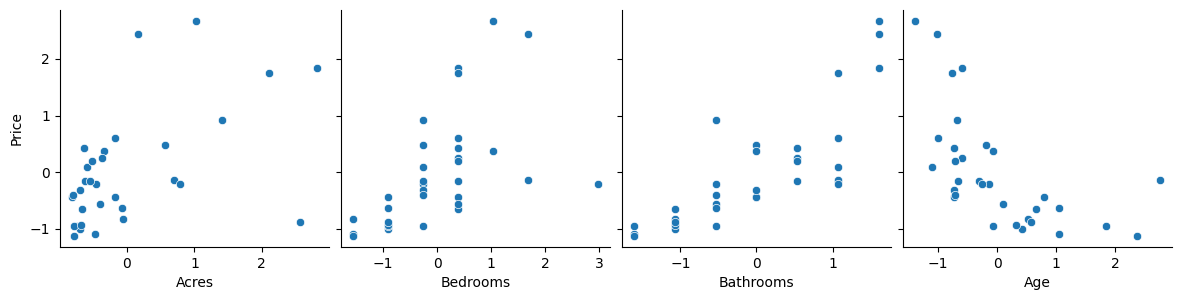

In [7]:
sns.pairplot(df, x_vars=['Acres', 'Bedrooms', 'Bathrooms', 'Age'], y_vars='Price', height=3, aspect=1, kind='scatter')
plt.show()

In [8]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [9]:
# fitting multiple linear regression to training set
regression = LinearRegression()
regression.fit(X_train, y_train)

print(regression.intercept_)
print(regression.coef_)

-0.022157396819867226
[ 0.33639193 -0.03234879  0.55565552 -0.25096041]


In [10]:
# predicting test and train set results
X_pred= regression.predict(X_train)
y_pred= regression.predict(X_test)

In [11]:
# difference between the actual value and the predicted value
regression_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})

regression_diff

,Actual value,Predicted value
29,-0.410752,-0.403385
15,-1.087641,-1.286850
24,0.423847,0.234220
17,-0.630626,-0.578804
8,0.370893,-0.153349
9,0.255776,0.289299
30,1.845543,1.956873


In [12]:
# evaluate performance
mean_squared_error(y_test, y_pred)

0.05239006243262695

In [13]:
r2_score(y_test, y_pred)

0.9327590696505875